x, y or z: y
Ry Degrees?: 45


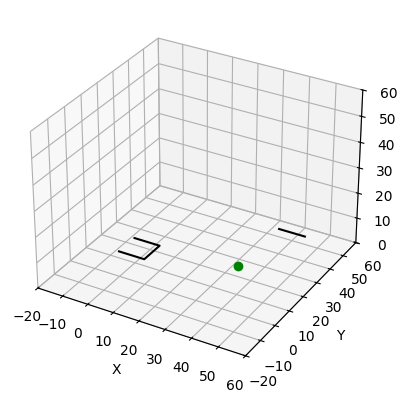

x, y or z: x
Rx Degrees?: 45


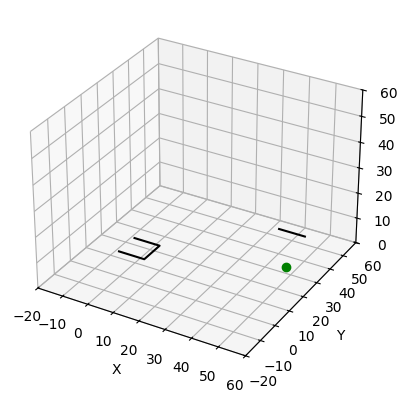

x, y or z: z
Rz Degrees?: 45


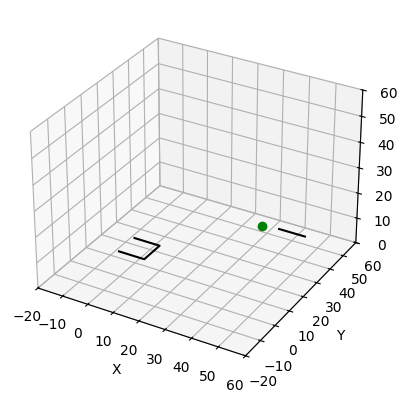

x, y or z: y
Ry Degrees?: 35


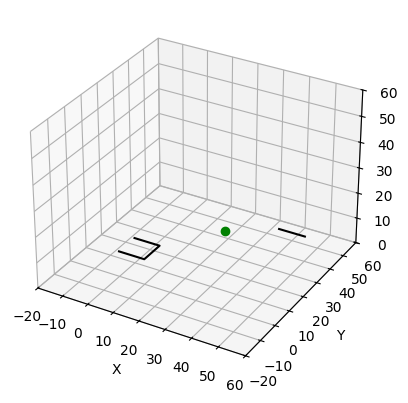

x, y or z: break


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, radians, sqrt

# --- Fill lists with starting coordinates
xg = []
yg = []
zg = []

# --- Center coordinates
xc = 0
yc = 40
zc = 0

# --- Geometry definition (system, plane and line)
x = [0, 10, 10, 0, 40, 50]
y = [0, 0, 10, 10, 40, 40]
z = [10, 10, 10, 10, 10, 10]

for i in range(len(x)):
    xg.append(x[i])
    yg.append(y[i])
    zg.append(z[i])

# --- Define rotation functions
def rotx(xc, yc, zc, x, y, z, Rx):
    y -= yc
    z -= zc
    yt = y * cos(Rx) - z * sin(Rx)
    zt = y * sin(Rx) + z * cos(Rx)
    return x, yt + yc, zt + zc

def roty(xc, yc, zc, x, y, z, Ry):
    x -= xc
    z -= zc
    xt = x * cos(Ry) + z * sin(Ry)
    zt = -x * sin(Ry) + z * cos(Ry)
    return xt + xc, y, zt + zc

def rotz(xc, yc, zc, x, y, z, Rz):
    x -= xc
    y -= yc
    xt = x * cos(Rz) - y * sin(Rz)
    yt = x * sin(Rz) + y * cos(Rz)
    return xt + xc, yt + yc, z

# --- Plot system
def plotsystem(xg, yg, zg, xh, yh, zh, hitcolor):
    plt.clf()
    ax = plt.axes(projection='3d')
    ax.plot(xg[:4], yg[:4], zg[:4], 'k')  # draw plane
    ax.plot([xg[4], xg[5]], [yg[4], yg[5]], [zg[4], zg[5]], 'k')  # line
    ax.plot([xh], [yh], [zh], hitcolor, marker='o')  # hit point
    ax.set_xlim([-20, 60])
    ax.set_ylim([-20, 60])
    ax.set_zlim([0, 60])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid(True)
    plt.pause(0.01)
    plt.show()

# --- Compute hit point
def hitpoint(x, y, z):
    ax = x[5] - x[4]
    ay = y[5] - y[4]
    az = z[5] - z[4]
    Q45 = sqrt(ax*ax + ay*ay + az*az)
    lx = ax / Q45
    ly = ay / Q45
    lz = az / Q45

    ax = x[3] - x[0]
    ay = y[3] - y[0]
    az = z[3] - z[0]
    Q03 = sqrt(ax*ax + ay*ay + az*az)
    ux = ax / Q03
    uy = ay / Q03
    uz = az / Q03

    ax = x[1] - x[0]
    ay = y[1] - y[0]
    az = z[1] - z[0]
    Q01 = sqrt(ax*ax + ay*ay + az*az)
    vx = ax / Q01
    vy = ay / Q01
    vz = az / Q01

    wx = uy*vz - vy*uz
    wy = uz*vx - vz*ux
    wz = ux*vy - vx*uy
    wn = sqrt(wx*wx + wy*wy + wz*wz)
    wx /= wn
    wy /= wn
    wz /= wn

    a = wx
    b = wy
    c = wz
    d = -(wx * x[0] + wy * y[0] + wz * z[0])
    Qh = abs(a * x[4] + b * y[4] + c * z[4] + d) / sqrt(a*a + b*b + c*c)
    cosPhi = (a * lx + b * ly + c * lz) / sqrt(a*a + b*b + c*c)
    Qh = Qh / cosPhi
    xh = x[4] + Qh * lx
    yh = y[4] + Qh * ly
    zh = z[4] + Qh * lz

    hitcolor = 'g'
    if Q45 < Qh:
        hitcolor = 'b'

    return xh, yh, zh, hitcolor

# --- Transform and plot

def plotx(xc, yc, zc, Rx):
    for i in range(len(x)):
        x[i], y[i], z[i] = rotx(xc, yc, zc, x[i], y[i], z[i], Rx)
    xh, yh, zh, hitcolor = hitpoint(x, y, z)
    plotsystem(xg, yg, zg, xh, yh, zh, hitcolor)

def ploty(xc, yc, zc, Ry):
    for i in range(len(x)):
        x[i], y[i], z[i] = roty(xc, yc, zc, x[i], y[i], z[i], Ry)
    xh, yh, zh, hitcolor = hitpoint(x, y, z)
    plotsystem(xg, yg, zg, xh, yh, zh, hitcolor)

def plotz(xc, yc, zc, Rz):
    for i in range(len(x)):
        x[i], y[i], z[i] = rotz(xc, yc, zc, x[i], y[i], z[i], Rz)
    xh, yh, zh, hitcolor = hitpoint(x, y, z)
    plotsystem(xg, yg, zg, xh, yh, zh, hitcolor)

# --- Main interactive loop
while True:
    axis = input('x, y or z: ')
    if axis == 'x':
        Rx = radians(float(input('Rx Degrees?: ')))
        plotx(xc, yc, zc, Rx)
    elif axis == 'y':
        Ry = radians(float(input('Ry Degrees?: ')))
        ploty(xc, yc, zc, Ry)
    elif axis == 'z':
        Rz = radians(float(input('Rz Degrees?: ')))
        plotz(xc, yc, zc, Rz)
    else:
        break